In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv('../data/preprocessed_data.csv')

labels = data.Depression
data = data.drop(columns=['Depression'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.70, random_state=5)

data.head()


,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Degree,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy
0,1,49.0,0.186035,1,0.047389,NaN,5.0,NaN,NaN,2.0,9.0,0,1.0,2.0,0,0.171902,True,False,False
1,0,26.0,0.137781,1,0.055411,NaN,4.0,NaN,NaN,3.0,4.0,1,7.0,3.0,0,0.155587,False,False,True
2,0,33.0,0.159042,0,0.181713,5.0,NaN,8.97,2.0,NaN,5.5,1,3.0,1.0,0,0.120531,True,False,False
3,0,22.0,0.130730,1,0.053929,NaN,5.0,NaN,NaN,1.0,4.0,1,10.0,1.0,1,0.131455,False,True,False
4,1,30.0,0.121874,1,0.053828,NaN,1.0,NaN,NaN,1.0,5.5,1,9.0,4.0,1,0.131455,False,False,True


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [11]:
test_data = pd.read_csv('../data/preprocessed_test_data.csv')



In [12]:
import xgboost as xgb

Accuracy: 0.94


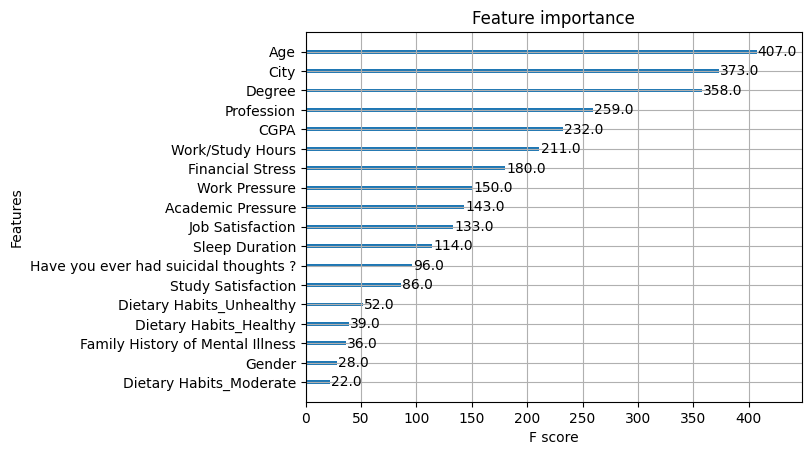

In [13]:
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "multi:softmax",  # Multiclass classification
    "num_class": 3,               # Number of classes
    "max_depth": 4,               # Maximum tree depth
    "eta": 0.3,                   # Learning rate
    "subsample": 0.8,             # Row sampling
    "colsample_bytree": 0.8       # Feature sampling
}

# Train the model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, train_dmatrix, num_rounds)


# Make predictions
y_pred = model.predict(test_dmatrix)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optional: Feature importance visualization
xgb.plot_importance(model)
import matplotlib.pyplot as plt
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Helps prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')  # Adjust output layer for the number of classes
])

# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use binary_crossentropy for binary classification
    metrics=['accuracy']
)

# Step 5: Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Number of training cycles
    batch_size=32,
    verbose=1
)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 7: Save the model
model.save('my_model.h5')

# Step 8: Optional - Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'X' is not defined

In [15]:
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
svm = SVC(random_state=0)
knn = KNeighborsClassifier()

In [16]:
dt_params = {"criterion": ["gini", "entropy"],
             "max_features": [None, "sqrt", "log2", 0.5]}

dt_cross = GridSearchCV(dt, dt_params)
dt_cross.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [None, 'sqrt', 'log2', 0.5]})

In [17]:
rf_params = {
    "n_estimators": [5, 100],
    "max_depth": [1, 10, None],
}

rf_cross = GridSearchCV(rf, rf_params)
rf_cross.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 10, None], 'n_estimators': [5, 100]})

In [18]:
print(accuracy_score(y_test, rf_cross.predict(X_test)))

0.9352842135217814


In [19]:
predictions = rf_cross.predict(test_data)

# Create sequential IDs starting from 140700
ids = range(140700, 140700 + len(predictions))

submission = pd.DataFrame({
    "id": ids,
    "Depression": predictions
})

submission.to_csv('../data/submission.csv', index=False)

In [21]:
# knn_params = {
#     "n_neighbors": [1, 5, 10, 20, 50],
#     "metric": ["euclidean", "manhattan"]
# }

# knn_cross = GridSearchCV(knn, knn_params)
# knn_cross.fit(X_train, y_train)

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py", line 238, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_base.py", line 475, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1064, in check_array
    _assert_all_finite(
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
